# Project: cleaning - [candy data]
### This notebook is for educational purpose . in this notebook we will do some cleaning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#Checking">Checking</a></li>
<li><a href="#Most_Loved_Chocolate">Most Loved Chocolate</a></li>
<li><a href="#Most_Hated_Chocolate">Most Hated Chocolate</a></li>  
<li><a href="#steps_Summary">Cleaning Steps Summary</a></li>  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> I will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Female ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleaning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- importing packages and loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


In [ ]:
data = "https://drive.google.com/uc?export=download&id=1mw-Twi9RO5OTtiQdondGu1eyjJg_frCI"
df = pd.read_csv(data)

In [ ]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


<a id='wrangling'></a>
## Data Wrangling (Preprocessing)



### General Properties

# 2- some general properties for the data

In [ ]:
df.shape

(2460, 120)

In [ ]:
df.describe(include = 'all')

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
count,2.460000e+03,2350,2419,2376,2396,2360,1713,1726,1788,1502,...,717,386,1716,9,1735,85.0,1362.0,99.0,67.0,1605
unique,NaN,2,4,106,128,511,3,3,3,3,...,685,385,2,1,2,NaN,NaN,NaN,NaN,952
top,NaN,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,...,Trump,nom nom nom!,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,NaN,NaN,NaN,NaN,"(77, 24)"
freq,NaN,2038,1467,92,699,132,873,1089,1559,793,...,7,2,1081,9,1091,NaN,NaN,NaN,NaN,9
mean,9.028016e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
std,7.435532e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
min,9.025877e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
25%,9.027520e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
50%,9.027780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
75%,9.028242e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [ ]:
df.dtypes

,0
Internal ID,int64
Q1: GOING OUT?,object
Q2: GENDER,object
Q3: AGE,object
Q4: COUNTRY,object
...,...
Q12: MEDIA [Daily Dish],float64
Q12: MEDIA [Science],float64
Q12: MEDIA [ESPN],float64
Q12: MEDIA [Yahoo],float64


In [ ]:
df.isnull().sum()

,0
Internal ID,0
Q1: GOING OUT?,110
Q2: GENDER,41
Q3: AGE,84
Q4: COUNTRY,64
...,...
Q12: MEDIA [Daily Dish],2375
Q12: MEDIA [Science],1098
Q12: MEDIA [ESPN],2361
Q12: MEDIA [Yahoo],2393


In [ ]:
null_count = df.isnull().sum()
null_percentage = (null_count/len(df))*100
nulls = pd.DataFrame(null_count, columns = ['null_count'])
nulls['null_percentage'] = null_percentage
nulls.sort_values(by=['null_percentage'], ascending=False, inplace=True)
nulls.head(10)

,null_count,null_percentage
Unnamed: 113,2451,99.634146
Q12: MEDIA [Yahoo],2393,97.276423
Q12: MEDIA [Daily Dish],2375,96.544715
Q12: MEDIA [ESPN],2361,95.975610
Q9: OTHER COMMENTS,2074,84.308943
Q8: DESPAIR OTHER,1743,70.853659
Q7: JOY OTHER,1549,62.967480
Q12: MEDIA [Science],1098,44.634146
Q6 | JoyJoy (Mit Iodine!),1026,41.707317
Q6 | Maynards,1024,41.626016


In [ ]:
df.duplicated().sum()

np.int64(0)

# 3- Summary about what I get from the previous functions

I started by viewing the first rows of the data and the shape of it (rows, columns) and i saw some descriptive statistics and some info like datatypes count and memory usage and the data type for each column and i started to look on the null values and it's percent to know what to drop and what to replace and what to leave
Next.. i will drop the columns wich has more than 50% of it a null values and go throw the df to make it cleaner

<a id= 'Cleaning'></a>
># cleaning

### 4- dropping all the useless columns and  rows with too much NaNs.
> useless columns like `Internal ID` and also like columns that has too much NaN
- renaming columns for easy access

In [ ]:
df.drop(['Internal ID', 'Unnamed: 113', 'Q12: MEDIA [Yahoo]', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [ESPN]',
        'Q9: OTHER COMMENTS', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER'], axis = 1, inplace= True)

In [ ]:
print(df.shape)
df.head()

(2460, 112)


,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,"(75, 23)"
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,1.0,"(70, 10)"


In [ ]:
df.columns.to_list()

['Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 'Q6 | 100 Grand Bar',
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bonkers (the board game)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we don’t know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental paraphenalia',
 'Q6 | Dots',
 'Q6 | Dove Bars',
 'Q6 | Fuzzy Peaches',
 'Q6 | Generic Brand Acetaminophen',
 'Q6 | Glow sticks',
 'Q6 | Goo Goo Clusters',
 "Q6 | Good N' Plenty",
 'Q6 | Gum from baseball cards

In [ ]:
Names = {'Q1: GOING OUT?': 'Going out',  'Q2: GENDER' : 'Gender', 'Q3: AGE': 'Age', 'Q4: COUNTRY': 'Country', 'Q5: STATE, PROVINCE, COUNTY, ETC' : 'Area',
            'Q10: DRESS': 'Dress', 'Q11: DAY' : 'Day','Q12: MEDIA [Science]': 'Media','Click Coordinates (x, y)' : 'x and y'}
df.rename(columns= Names, inplace = True)

### 5 - cleaning `going out` column

In [ ]:
df['Going out'] = df['Going out'].fillna('No Answer')

In [ ]:
df['Going out'].value_counts()

,count
Going out,
No,2038
Yes,312
No Answer,110


### 6 - cleaning `gender` column

In [ ]:
df['Gender'] = df['Gender'].fillna('Un Known')
df['Gender'] = df['Gender'].replace('I\'d rather not say','Un Known')
df['Gender'] = df['Gender'].replace('Other','Un Known')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1467
Female,839
Un Known,154


### 7 - cleaning ` age` column
> Note the type of age column, and NaNs values

In [ ]:
df['Age'].dtypes

dtype('O')

In [ ]:
df['Age'].unique()

array([nan, '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39.4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [ ]:

df['Age'] = df['Age'].replace('sixty-nine', '69')
df['Age'] = df['Age'].replace('46 Halloweens.', '46')
df['Age'] = df['Age'].replace('70 1/2', '70')
df['Age'] = df['Age'].replace('59 on the day after Halloween', '59')
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')
df['Age'].unique()


array([   nan,   44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,
         56. ,   64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,
         25. ,   34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,
         52. ,   63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,
         42. ,   62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,
         30. ,   22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,    1. ,    4. ])

In [ ]:
df['Age'].describe()

,Age
count,2355.000000
mean,42.636688
std,23.839773
min,1.000000
25%,34.000000
50%,41.000000
75%,50.000000
max,1000.000000


>Note : Min can't be 1 and Max can't be 1000 There is outliers let's remove them

/tmp/ipython-input-32917220.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Age'], ax = axs[1], shade= True)


Text(0.5, 0.98, 'Age_befor_cleaning')

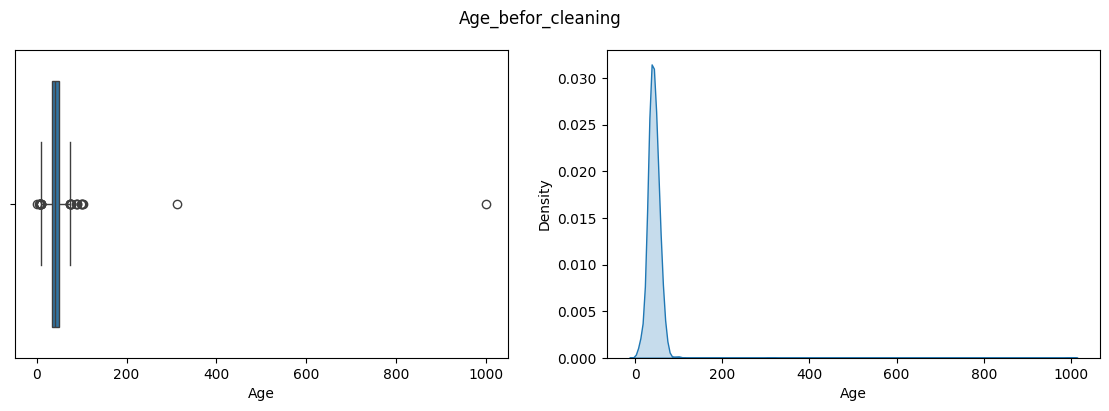

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x=df['Age'], ax = axs[0])
sns.kdeplot(x=df['Age'], ax = axs[1], shade= True)
plt.suptitle('Age_befor_cleaning')

> Note : The values and the figure isn't Normally distributed because of outliers

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
df['Age'] = df['Age'].apply(lambda age: np.nan if age > Upper or age < Lower else age)



In [ ]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)


/tmp/ipython-input-2652203818.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Age'], ax = axs[1], shade = True)


Text(0.5, 0.98, 'Age_after_cleaning')

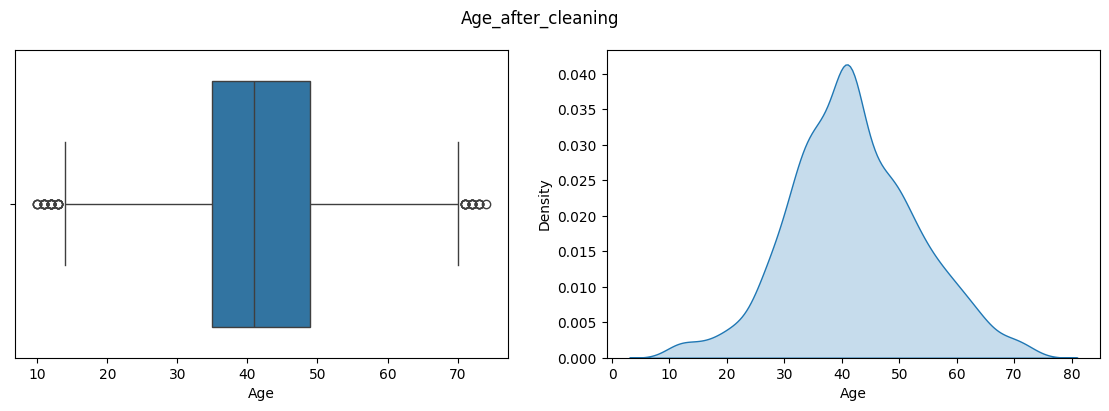

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x=df['Age'], ax = axs[0])
sns.kdeplot(x=df['Age'], ax = axs[1], shade = True)
plt.suptitle('Age_after_cleaning')

> Note : Now the figures are better and Normally distributed after removing the outliers

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
print(df['Age'].dtypes)
df['Age'].describe()

int64


,Age
count,2460.000000
mean,41.993089
std,11.161590
min,10.000000
25%,35.000000
50%,41.000000
75%,49.000000
max,74.000000


### 8 - cleaning ` country` column
> Note that country column has country names with different writing ways
  - I will use fuzzywuzzy to deal with this problem

In [ ]:
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()


In [ ]:
df['Country'].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america', '35',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states', '46',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       '45', 'united state', '32', 'a', 'can', 'canae', 'new york',
       'trumpistan', 'ireland', 'united sates', 'korea', 'california',
       'japan', 'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'sou

> If you don't have the library you can download it using this

In [ ]:
# !pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

countries = ['usa', 'united states', 'united states of america', 'america' , 'uk', 'united kingdom',
          'england', 'mexico', 'canada','france', 'finland', 'germany', 'netherlands',
    'costa rica', 'australia', 'greece', 'ireland', 'japan', 'south africa', 'iceland', 'denmark', 'switzerland', 'south korea', 'indonesia',
    'china', 'taiwan', 'spain', 'sweden', 'singapore'
]

for country in countries:
  matches = process.extract(country, df['Country'], limit=df.shape[0])
  for m in matches:
    if m[1] >= 80 :
      df.loc[df['Country'] == m[0], 'Country'] = country

In [ ]:
df['Country'].unique()

array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae', 'england',
       'mexico', 'u.s.a.', '35', 'france', 'finland', 'north carolina',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica', '46',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', '45', '32', 'canae',
       'new york', 'trumpistan', 'iceland', 'south korea', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'ud', 'new jersey', 'indonesia', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a', '1',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [ ]:
df['Country'].replace(['murica', 'america', 'u.s.a', 'u s a', 'usa? hard to tell anymore..',
                        'north carolina', 'new york', 'new jersey'], 'usa', inplace=True)
df['Country'].replace(['u.k.', 'ud', 'england', 'scotland'], 'uk', inplace=True)
df['Country'].replace('canae', 'canada', inplace=True)


/tmp/ipython-input-15449439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace(['murica', 'america', 'u.s.a', 'u s a', 'usa? hard to tell anymore..',


In [ ]:
df['Country'] = df['Country'].apply(lambda c : c if c in countries else 'other')

In [ ]:
df['Country'].isnull().sum()

np.int64(0)

In [ ]:
df['Country'].value_counts()

,count
Country,
usa,2051
canada,227
other,95
uk,27
germany,10
netherlands,7
australia,7
japan,5
iceland,5


### 9 - cleaning `area` column
> I will do the same as i did before using fuzzywuzzy

In [ ]:
df['Area'] = df['Area'].str.strip()
a =pd.DataFrame(df['Area'].value_counts())

a.head(30)

,count
Area,
California,153
CA,89
Illinois,68
Texas,63
Ontario,59
Oregon,52
New York,46
Pennsylvania,44
WA,40


In [ ]:
df['Area'].value_counts() / df.shape[0] * 100

,count
Area,
California,6.219512
CA,3.617886
Illinois,2.764228
Texas,2.560976
Ontario,2.398374
...,...
delaware,0.040650
"Northbrook, IL",0.040650
"Marietta, GA",0.040650


In [ ]:
df['Area'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Los Angeles, California', 'CA', 'New York',
       'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota', 'London',
       'mn', 'TEXAS', 'Illinois', 'District of Columbia', 'Washington',
       'Massachusetts', 'OR', 'Montana', 'massachusetts', 'Abu Dhabi',
       'TX', 'Arizona', 'Dc', 'yukon', 'Pennsylvania', 'MD', 'Ohio',
       'OXFORDSHIRE', 'DC', 'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI',
       'alaska', 'Ny', 'Colorado, Jefferson county', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska', 'Oregon', 'UT', 'ny', 'CDMX',
       'north carolina', 'Tennessee', 'Knox county, Tennessee',
       'New Mexico', 'Maine', 'maine', 'Virginia, Arlington', 'WA', 'MO',
       

In [ ]:
areas_replace = {'CA': 'California', 'ca': 'California', 'IL': 'Illinois', 'WA': 'Washington', 'NY': 'New York', 'PA': 'Pennsylvania',
    'MA': 'Massachusetts', 'MN': 'Minnesota', 'NC': 'North Carolina', 'VA': 'Virginia', 'GA': 'Georgia', 'BC': 'British Columbia'
}
df['Area'] = df['Area'].replace(areas_replace)


In [ ]:
areas = ['California', 'Texas', 'Ontario', 'Illinois', 'Oregon', 'New York', 'Ohio', 'Virginia', 'Washington',
        'Massachusetts', 'Pennsylvania', 'Colorado', 'Alberta', 'Florida', 'Michigan', 'Wisconsin', 'California','Maryland',
        'Minnesota', 'North Carolina', 'Georgia', 'British Columbia']

for area in areas:
  matches = process.extract(area, df['Area'], limit=df.shape[0])
  for m in matches:
    if m[1] >= 80 :
      df.loc[df['Area'] == m[0], 'Area'] = area
df['Area'] = df['Area'].apply(lambda a : a if a in areas else "Other")

In [ ]:
print(df['Area'].isnull().sum())
df['Area'].value_counts() / df.shape[0] * 100

0


,count
Area,
Other,32.195122
California,14.105691
Washington,5.040650
Illinois,4.796748
New York,4.227642
Ontario,3.983740
Massachusetts,3.821138
Pennsylvania,3.699187
Texas,2.967480


/tmp/ipython-input-3425920190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Area", data=df, order=df['Area'].value_counts().index, palette="viridis")


Text(0.5, 1.0, 'Count of Each Country')

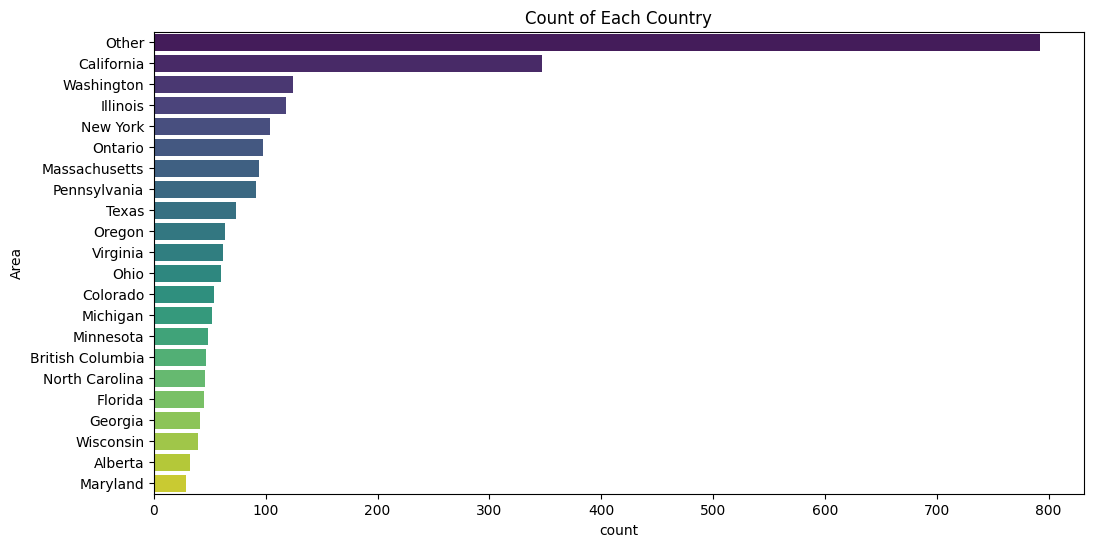

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Area", data=df, order=df['Area'].value_counts().index, palette="viridis")
plt.title("Count of Each Country")

### 10 - cleaning ` Q6` columns
>- Note : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
>- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df_Q6 = df.iloc[:, 5: -4]
df_Q6.isnull().sum().sum()

np.int64(77825)

> • I could use `col.startswith('Q6')` and work on the original df

In [ ]:
for col in df_Q6.columns :
    df_Q6[col] = df_Q6[col].fillna('un known')


In [ ]:
df_Q6.isnull().sum().sum()

np.int64(0)

In [ ]:
df.iloc[:, 5:df.shape[1] - 4] = df_Q6

In [ ]:
df.iloc[:, 5:df.shape[1] - 4].isnull().sum()

,0
Q6 | 100 Grand Bar,0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),0
Q6 | Any full-sized candy bar,0
Q6 | Black Jacks,0
Q6 | Bonkers (the candy),0
...,...
Q6 | Vicodin,0
Q6 | Whatchamacallit Bars,0
Q6 | White Bread,0
Q6 | Whole Wheat anything,0


### 11 - cleaning `dress` column

> • I thought to fill the NANs with 'other' but when I saw the survey pdf I saw that was a 2 choices for dress in the survey and the person have to choose one so I decided to fill it with the mode

In [ ]:
df['Dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [ ]:
Dress_mode = df['Dress'].mode()[0]
df['Dress'] = df['Dress'].fillna(Dress_mode)

In [ ]:
df['Dress'].unique()

array(['White and gold', 'Blue and black'], dtype=object)

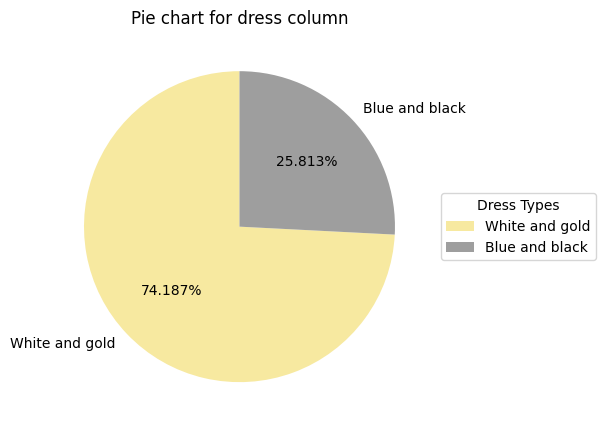

In [ ]:
count_dress = df['Dress'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#F7E9A0', '#9E9E9E', '#1C2A5E']
plt.pie(count_dress, labels = count_dress.index, colors = colors, autopct='%1.3f%%', startangle=90)
plt.title('Pie chart for dress column')
plt.legend(count_dress.index, title="Dress Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

### 12 - cleaning ` day` column

In [ ]:
df['Day']

,Day
0,NaN
1,Sunday
2,NaN
3,Sunday
4,Friday
...,...
2455,Friday
2456,Friday
2457,Friday
2458,NaN


In [ ]:
Day_mode = df['Day'].mode()[0]
df['Day'] = df['Day'].fillna(Day_mode)

In [ ]:
df['Day'].unique()

array(['Friday', 'Sunday'], dtype=object)

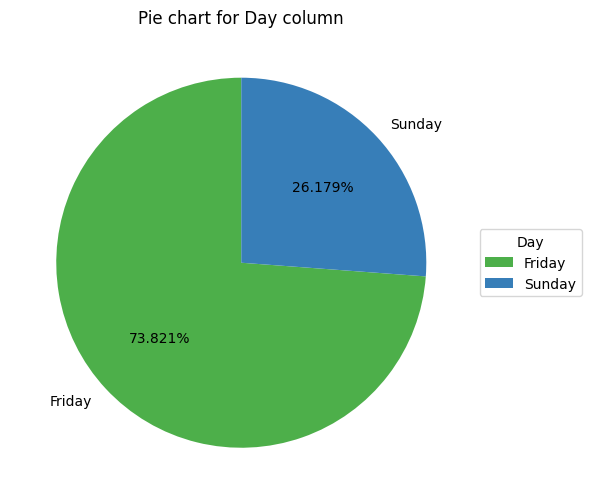

In [ ]:
count_D = df['Day'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#4daf4a', '#377eb8']
plt.pie(count_D, labels = count_D.index, colors = colors, autopct='%1.3f%%', startangle=90)
plt.title('Pie chart for Day column')
plt.legend(count_D.index, title="Day", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

<a id = 'Checking'></a>
### 13 - Checking
> after finish cleaning I will make sure my data is clean and that:
 - there is no wrong data type
 - there is no NaNs
 - all the column are clean and ready for the next step `EDA`

In [ ]:
df.dtypes

,0
Going out,object
Gender,object
Age,int64
Country,object
Area,object
...,...
Q6 | York Peppermint Patties,object
Dress,object
Day,object
Media,float64


In [ ]:
df.isnull().sum()

,0
Going out,0
Gender,0
Age,0
Country,0
Area,0
...,...
Q6 | York Peppermint Patties,0
Dress,0
Day,0
Media,1098


In [ ]:
sz = df.shape[1]
df.iloc[: , -2 : ].isnull().sum()

,0
Media,1098
x and y,855


In [ ]:
df['Media'] = df['Media'].fillna(0)
df['x and y'] = df['x and y'].fillna('(0, 0)')

In [ ]:
print(df.isnull().sum().sum())
df.isnull().sum()

0


,0
Going out,0
Gender,0
Age,0
Country,0
Area,0
...,...
Q6 | York Peppermint Patties,0
Dress,0
Day,0
Media,0


In [ ]:
df.describe(include = ['O'])

,Going out,Gender,Country,Area,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),...,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Dress,Day,x and y
count,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,...,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460
unique,3,3,24,22,4,4,4,4,4,4,...,4,4,4,4,4,4,4,2,2,953
top,No,Male,usa,Other,JOY,DESPAIR,JOY,un known,un known,un known,...,JOY,DESPAIR,un known,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,"(0, 0)"
freq,2038,1467,2051,792,873,1089,1559,958,992,1006,...,1413,1146,789,840,1455,1289,1105,1825,1816,855


In [ ]:
df_check = pd.DataFrame({'Data_types' : df.dtypes, 'Null_cnt' : [df[col].isnull().sum() for col in df.columns]})
df_check

,Data_types,Null_cnt
Going out,object,0
Gender,object,0
Age,int64,0
Country,object,0
Area,object,0
...,...,...
Q6 | York Peppermint Patties,object,0
Dress,object,0
Day,object,0
Media,float64,0


<a id = 'Most_Loved_Chocolate'></a>
> ### Making a plot for the Most Loved Chocolates

In [ ]:
df_vis = pd.DataFrame({'Chocolates' : [col[5:] for col in df_Q6.columns],
'Joy_cnt' : [df_Q6[col].value_counts()['JOY'] for col in df_Q6.columns],
'Despair_cnt' : [df_Q6[col].value_counts()['DESPAIR'] for col in df_Q6.columns]})
df_vis.sort_values(by = 'Joy_cnt',ascending=False, inplace= True)


/tmp/ipython-input-1698792226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_vis.head(15), x = 'Joy_cnt', y = 'Chocolates', palette = 'viridis')


Text(0.5, 1.0, 'Top 15 Most Loved Chocolates')

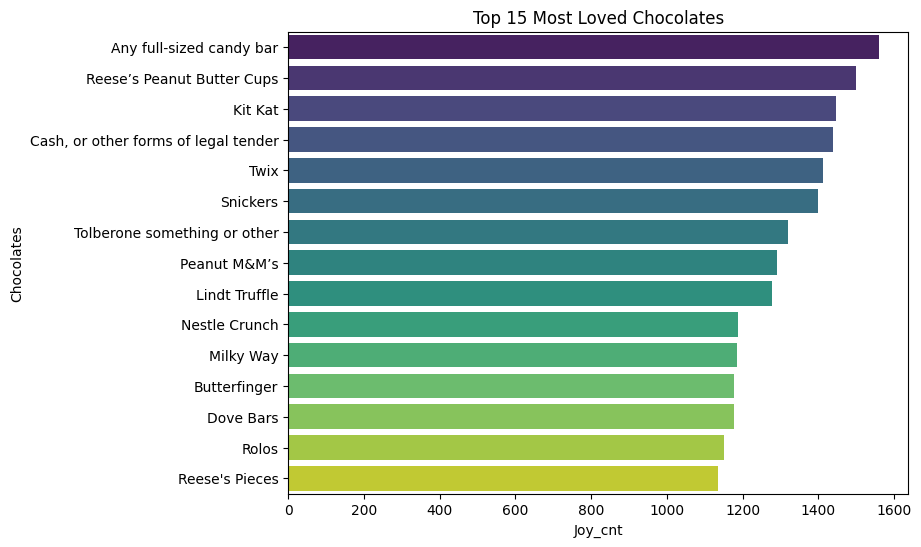

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df_vis.head(15), x = 'Joy_cnt', y = 'Chocolates', palette = 'viridis')
plt.title("Top 15 Most Loved Chocolates")

<a id = 'Most_Hated_Chocolate'></a>
> ### Making a plot for the Most Hated Chocolates

In [ ]:
df_hated_vis = df_vis.sort_values(by = 'Despair_cnt',ascending=False).copy()


/tmp/ipython-input-1380680925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_hated_vis.head(15), x = 'Despair_cnt', y = 'Chocolates', palette = 'flare_r')


Text(0.5, 1.0, 'Top 15 Most Hated Chocolates')

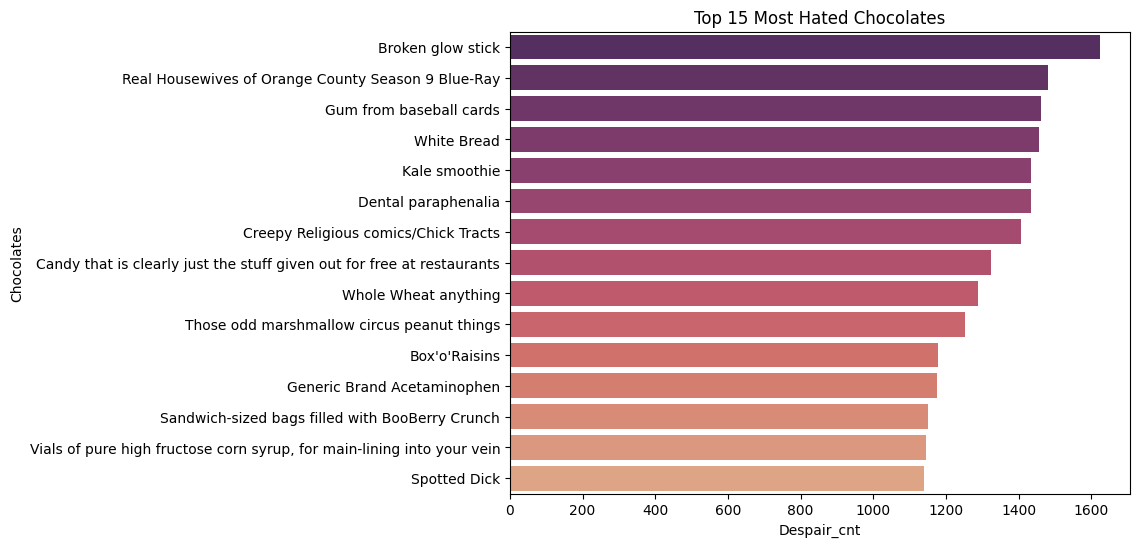

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df_hated_vis.head(15), x = 'Despair_cnt', y = 'Chocolates', palette = 'flare_r')
plt.title("Top 15 Most Hated Chocolates")

<a id = 'steps_Summary'></a>
> ### Summary about all the cleaning steps



*   First I explored the data and dropped the undesired columns (that have alot of NANs or unuseful
*   Then i changed tha name of some columns for easy access


*   I cleanrd the 'Going out' column but replacing the NANs with 'No Answer'

*   Then the same for 'Gender' column by replacing NANs with 'un known'

*   And for the 'Age' column there was some outliers and NANs I replaced them by the median Age and changed it's type to be int64 valid for age type

*   After that I cleaned the 'Country' column by replacing some country names that was written with different way or wrong spelling for same country to make it all the same word or spelling using the fuzzywuzzy library to extract how close the spelling of the word to the desired correct spelling and for NANs i made the 'other'


*   For the 'Area' column i did the same thing becaus i realized if i took only the top 20 areas there will be more that 50% marked as 'other' so i used the fuzzywuzzy again to match the closest areas with the same name and i replaced some abbreviations with the real name to make the process easier and one name for each country and like before NANs become 'other'


*   And for all the columns starts with 'Q6' I took a sub dataframe with them and replaced all NANs and re replace it in the original df

*   then I replaced the NANs in the 'Dress' column with 'other'

*   And in 'Day' column i replaced the NANs with thme mode which  was 'friday'



*   And lastly i checked for nulls found that 'Media' and 'x and y' columns has NANs so i replaced them with 0 and '(0, 0)'

*   In last i checked the data types and nulls and it was all clear we can do our EDA Now ✌




→ After that, there are two visuals for the top 15 Most Loved ☺ and Top 15 Hated ☹ Choclates

